<a href="https://colab.research.google.com/github/planet-c-am/Heatmap/blob/main/Monthly%20Sales%20Heatmap%20for%20Top%204%20States.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-4082820611.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['Month_name'] =pd.to_datetime(df_2018['Order Date']).dt.strftime('%B')
/tmp/ipython-input-4082820611.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['Month_name'] = pd.Categorical(
/tmp/ipython-input-4082820611.py:46: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the

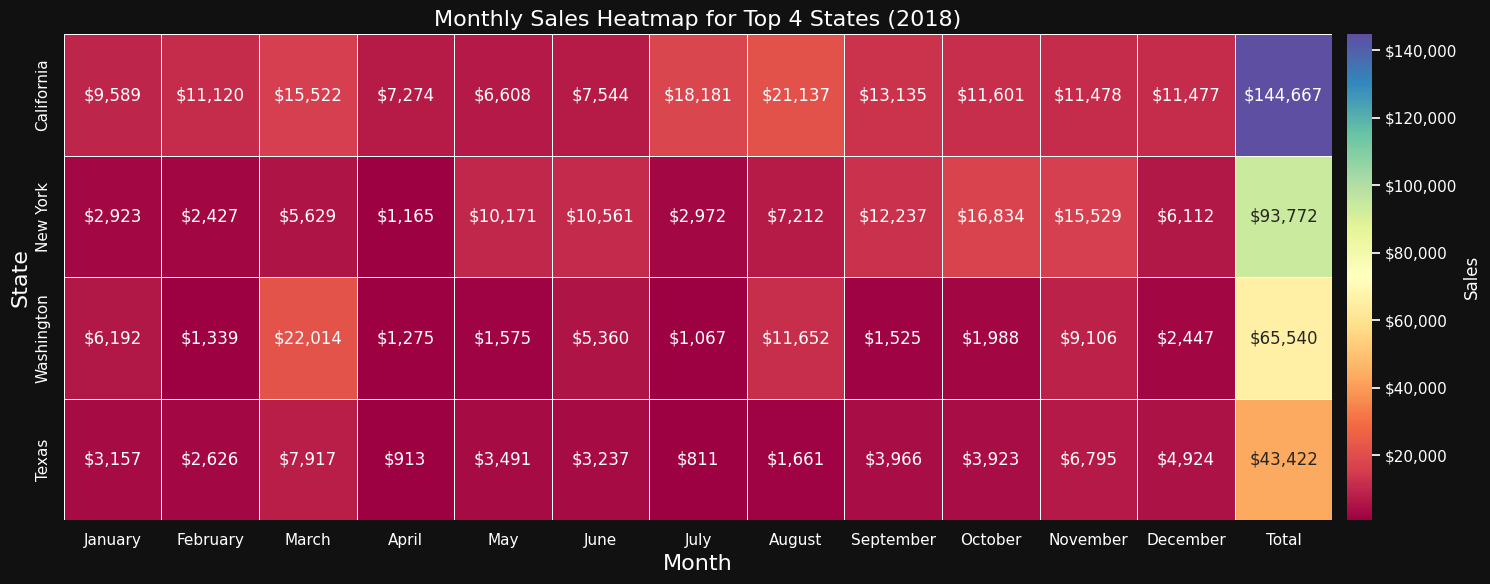

In [5]:
from collections.abc import Collection
# @title Monthly Sales Heatmap for Top 4 States (2018)
#========================================================================Logical Part====================================================================
# step 1: import libraies function
import numpy as np
import pandas as pd
from dateutil import parser

# step 2: lode data
df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vR-6XYWtaoxDCiZOi6PQODs_ubL08CvVzL6Q39LOquPGDTCAMQ3xjTpRLDereRI011A7lbxIS7iXsWU/pub?gid=574248564&single=true&output=csv")

# step 3: date parsing formatting
def try_parse_date(x):
  try:
    return parser.parse(x, dayfirst = False)
  except:
    try:
      return parser.parse(x, dayfirst = True)
    except:
      return pd.NaT

# step 4: clean data
df['Order Date'] = df['Order Date'].apply(try_parse_date)
df = df[df['Order Date'].notna()]
df = df[df['Sales'].notna() &(df['Sales']>0)]

# step 5: filter data for a Specific year and State
df_2018 = df[df['Order Date'].dt.year==2018]
# Extract month name from date
df_2018['Month_name'] =pd.to_datetime(df_2018['Order Date']).dt.strftime('%B')


# Fix month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

df_2018['Month_name'] = pd.Categorical(
    df_2018['Month_name'], categories=month_order, ordered=True
)

# step 6: top 10 state
top_10_state = df_2018.groupby('State')['Sales'].sum().nlargest(4).index.tolist()
top_state = df_2018[df_2018['State'].isin(top_10_state)]

# step 7: table design / table frature (pivot_table)
table_design = top_state.pivot_table(
  index = 'State',
  columns = 'Month_name',
  values = 'Sales',
  aggfunc = 'sum'
)

table_design['Total'] = table_design.sum(axis=1)
table_design = table_design.sort_values(by='Total', ascending = False)

# step 8: create annottable for heatmap
annot_table = table_design.applymap(lambda x: f'${x:,.0f}')


#=========================================================================Design part================================================================
# step 1: import requard libraies function
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# step 2: theme/style(seaborn)
sns.set_theme(style='darkgrid', rc={
    'axes.facecolor':'#111111',
    'figure.facecolor':'#111111',
    'axes.labelcolor':'white',
    'xtick.color':'white',
    'ytick.color':'white',
    'text.color':'white'
})

# step 3: figure size
plt.figure(figsize = (16,6))

# step 4: colormap(colormap, annotation formating, linewidth, linecolor, colorbar)
colormap = sns.heatmap(table_design,
                       annot= annot_table,
                       fmt ='',
                       cmap = 'Spectral',
                       linewidth = 0.5,
                       linecolor = 'white',
                       cbar_kws={'label':'Sales',
                                 'pad':0.01})

# step 5: colorbar access and customization
colorbar = colormap.collections[0].colorbar #access
colorbar.ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'${x:,.0f}')) #customizetion

# step 6: title and label
plt.title('Monthly Sales Heatmap for Top 4 States (2018)', color = 'white', fontsize =16)
plt.xlabel('Month', color = 'white', fontsize =16)
plt.ylabel('State',color ='white', fontsize =16)

plt.savefig('Monthly Sales Heatmap for Top 4 States (2018).pdf')
plt.savefig('Monthly Sales Heatmap for Top 4 States (2018).pdf')
# step 7: final layout
plt.tight_layout()
plt.show()